In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from extract_drift_and_volatility import extract_drift_and_volatility
from simulate_prices_gbm import simulate_gbm
from get_weights import get_weights

### Obtain GBM Simulation for assets prices

In [8]:
# weights
risk_free_rate = 0.05
market_return = 0.5

# Obtain historical prices
df = pd.read_csv('historical_prices.csv')
assets_params = extract_drift_and_volatility(df)
prices_gbm = simulate_gbm(assets_params)
prices_gbm

,BTC,ETH,BNB,SOL,USDC,XRP,DOGE,ADA,SHIB,AVAX,...,FLOKI,AR,GRT,TAO,OP,FDUSD,SUI,VET,INJ,MKR
0.0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
1.0,1.112937e+02,2.343169e+02,2.544717e+02,1.222293e+02,101.596760,72.101078,7.505487e+02,5.873397e+01,4.934102e+01,6.838728e+01,...,8.297307e+01,3.141344e+02,5.516177e+02,5.558857e+00,1.568881e+02,100.111158,6.841539e+01,4.672603e+02,6.712406e+02,1.344966e+02
2.0,1.866867e+02,7.139147e+02,5.887187e+02,3.835290e+02,103.946971,72.343076,4.978165e+02,7.099181e+01,4.087932e+01,3.277652e+02,...,5.255577e+01,9.606637e+02,1.606309e+02,8.781190e-01,1.917342e+02,99.731918,6.740441e+01,3.987905e+02,3.012168e+03,1.922843e+02
3.0,3.756008e+02,1.605186e+03,1.275601e+03,2.114255e+03,107.065611,45.531402,1.441964e+03,1.495526e+02,1.575155e+01,1.569095e+02,...,6.034343e+01,2.121511e+04,2.529441e+02,6.287764e-02,3.362358e+02,99.886215,1.945970e+01,2.243862e+02,6.026171e+03,1.382276e+02
4.0,5.063649e+02,2.801260e+03,1.262780e+03,6.125187e+03,109.515105,65.254341,2.363606e+03,1.177398e+02,2.386968e+01,9.237467e+01,...,5.770317e+02,3.359670e+04,1.002652e+03,2.308856e-03,4.176635e+02,102.454546,1.510059e+01,2.494040e+02,4.214158e+04,1.002812e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96.0,6.313588e+26,3.082537e+20,2.251343e+23,2.217345e+45,688.873015,5921.014568,9.613895e+15,5.220320e+07,1.235217e+15,1.717921e+17,...,6.014362e+22,3.352209e+26,7.666662e+21,6.888930e-96,4.795746e+05,96.246840,3.351061e-20,4.235030e+10,1.091346e+44,3.543419e+28
97.0,2.169174e+27,6.881943e+20,3.646569e+23,7.366667e+45,712.636057,6247.431847,5.987783e+15,3.452580e+07,1.025660e+15,1.258399e+17,...,4.322012e+22,7.892809e+26,1.434492e+22,1.257109e-97,5.741415e+05,92.472705,6.164885e-21,8.303448e+09,1.790376e+43,9.027294e+28
98.0,4.097904e+27,1.174641e+21,5.299056e+23,3.179966e+46,752.612645,4350.500541,7.576518e+15,1.081274e+08,1.035957e+15,3.096708e+17,...,1.487309e+22,6.044696e+27,7.848175e+21,8.860896e-99,6.123891e+05,91.727392,1.542171e-21,9.807684e+09,1.059080e+43,9.679064e+29
99.0,1.175183e+28,1.115538e+21,3.924160e+23,1.217517e+47,774.326504,6294.594384,1.059355e+16,1.079577e+08,1.057849e+15,1.173113e+18,...,3.351983e+21,5.181125e+27,1.752907e+22,1.335385e-99,6.104224e+05,93.011506,8.526030e-22,2.265735e+10,4.169625e+43,2.695509e+30


### Obtain returns lists

In [9]:
returns = prices_gbm.pct_change()
eth = prices_gbm['ETH']
eth_returns = eth.pct_change()

returns = returns.replace([np.nan, np.inf, -np.inf], 0)
eth_returns = eth_returns.replace([np.nan, np.inf, -np.inf], 0)

### Get min variance optimiation weights and max sharpe weights

In [10]:
# Get weights
weights = get_weights(risk_free_rate, market_return, prices_gbm)
min_variance_weights = weights['Min Weight']
max_sharpe_weights = weights['Max Weight']
# Extract non zero weight assets
filtered_max_sharpe= weights[weights['Max Weight'] != 0]
# Create a sub-dictionary with non-zero values
filtered_dict = dict(zip(filtered_max_sharpe['Names'], filtered_max_sharpe['Max Weight']))


print(filtered_dict)

{'AR': 1.0}


### Run a simulation of portfolio assets vs eth

In [11]:
# Calculate total weighted assets
portfolio_sum = 0

for key, value in filtered_dict.items():
    portfolio_sum += returns[key] * value

portfolio_sum = portfolio_sum.fillna(0) 
eth_returns = eth_returns.fillna(0) 

# Simulate portfolio returns
n = len(eth_returns.index)
portfolio_eth = np.zeros(n)
portfolio_assets = np.zeros(n)
v0 = 1000
portfolio_eth[0] = v0
portfolio_assets[0] = v0


for i in range (1, n):
    portfolio_eth[i] = (1+eth_returns[i-1])*portfolio_eth[i-1]
    portfolio_assets[i] = (1+portfolio_sum[i-1])*portfolio_assets[i-1]

### Plot results

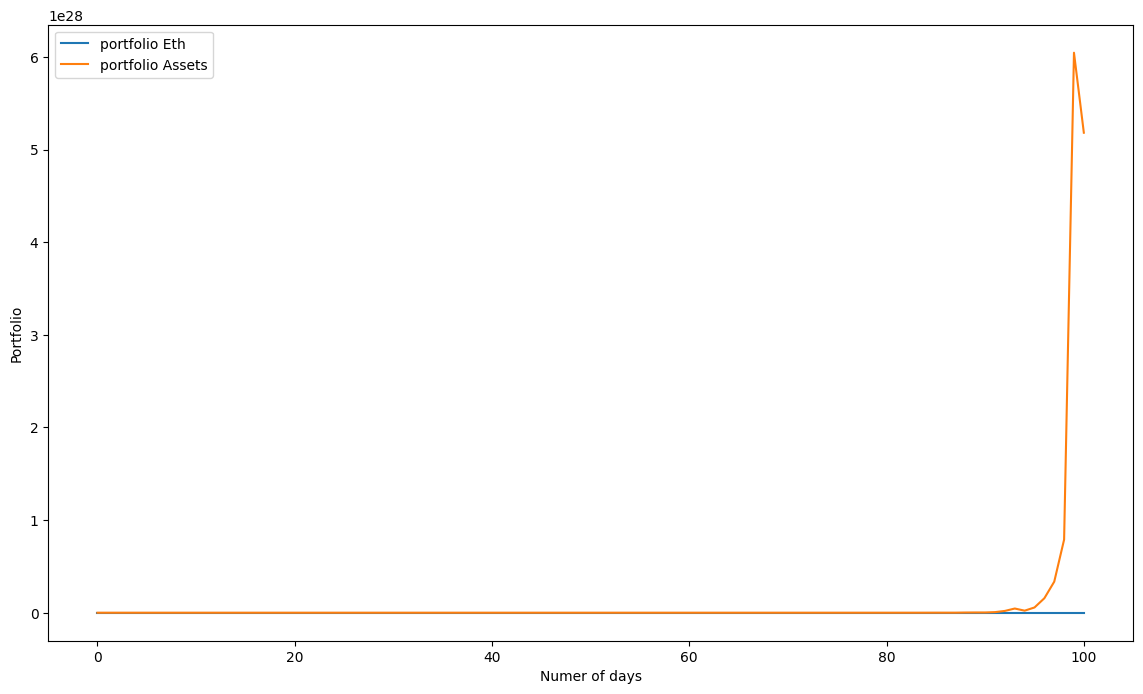

In [12]:
# Plot
plt.figure(figsize=(14, 8))
plt.plot(portfolio_eth , label='portfolio Eth')
plt.plot(portfolio_assets , label='portfolio Assets')
plt.legend()
plt.xlabel('Numer of days')
plt.ylabel('Portfolio')
plt.show()